In [1]:
# 라이브러리 설치
!pip install opencv-python mediapipe

In [2]:
# 라이브러리 설정
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

In [3]:
# Initializing mediapipe pose class.
# mediapipe pose class를 초기화 한다.
mp_pose = mp.solutions.pose
 
# Setting up the Pose function.
# pose detect function에 image detect=True, 최소감지신뢰도 = 0.3, 모델 복잡도 =2를 준다.
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)
 
# Initializing mediapipe drawing class, useful for annotation.
# mediapipe의 drawing class를 초기화한다.
mp_drawing = mp.solutions.drawing_utils

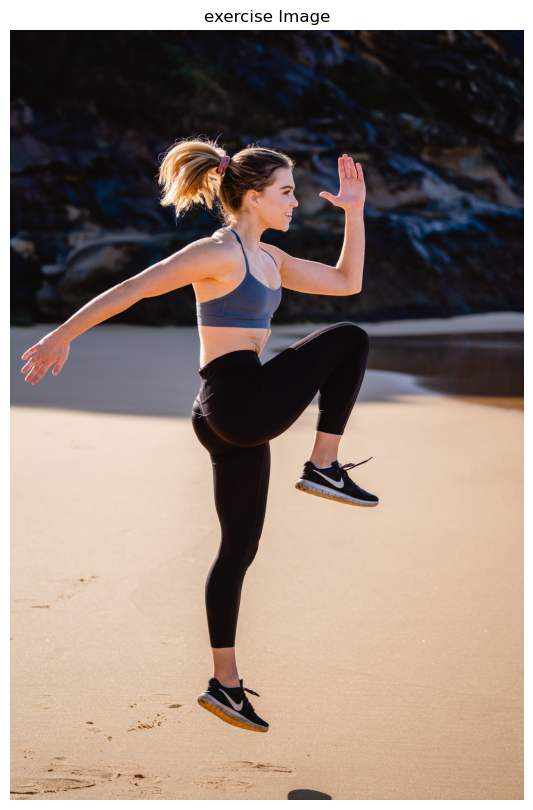

In [12]:
# 이미지 읽어오기
# 샘플 이미지를 cv2.imread()로 읽어온다
# Read an image from the specified path.
sample_img = cv2.imread('image/exercise_img/exercise_3.jpg')
 
# Specify a size of the figure.
plt.figure(figsize = [10, 10])
 
# Display the sample image, also convert BGR to RGB for display. 
plt.title("exercise Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

In [13]:
# pose detect 수행
# Perform pose detection after converting the image into RGB format.
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
 
# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Iterate two times as we only want to display first two landmarks.
    for i in range(2):
        
        # Display the found normalized landmarks.
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}')

NOSE:
x: 0.5658171772956848
y: 0.2269279807806015
z: -0.13067933917045593
visibility: 0.9999983310699463

LEFT_EYE_INNER:
x: 0.5541633367538452
y: 0.2119283229112625
z: -0.09378553181886673
visibility: 0.9999924898147583



In [14]:
# Retrieve the height and width of the sample image.
image_height, image_width, _ = sample_img.shape
 
# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Iterate two times as we only want to display first two landmark.
    for i in range(2):
        
        # Display the found landmarks after converting them into their original scale.
        print(f'{mp_pose.PoseLandmark(i).name}:') 
        print(f'x: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x * image_width}')
        print(f'y: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y * image_height}')
        print(f'z: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].z * image_width}')
        print(f'visibility: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}\n')

NOSE:
x: 1207.4538563489914
y: 726.1695384979248
z: -278.86970978975296
visibility: 0.9999983310699463

LEFT_EYE_INNER:
x: 1182.5845606327057
y: 678.17063331604
z: -200.1383249014616
visibility: 0.9999924898147583



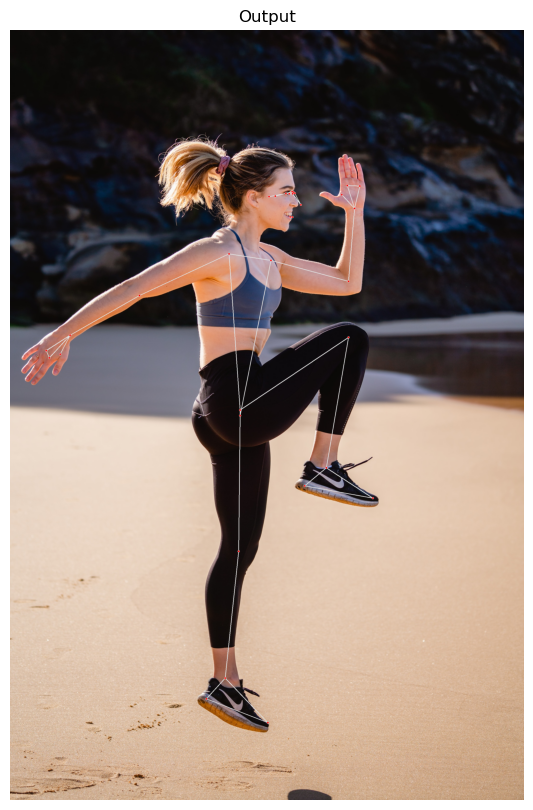

In [15]:
# 랜드마크를 그릴 사진을 COPY한다.
img_copy = sample_img.copy()
 
# 랜드마크를 찾는다.
if results.pose_landmarks:
    
    # sample image에 landmark를 그린다.
    mp_drawing.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
       
    # figure의 크기를 설정한다.
    fig = plt.figure(figsize = [10, 10])
 
    # landmark가 draw된 image를 보여주기 전에 BGR TO RGB를 위해 copy_image의 순서를 반대로 변형해준다. 
    plt.title("Output");plt.axis('off');plt.imshow(img_copy[:,:,::-1]);plt.show()

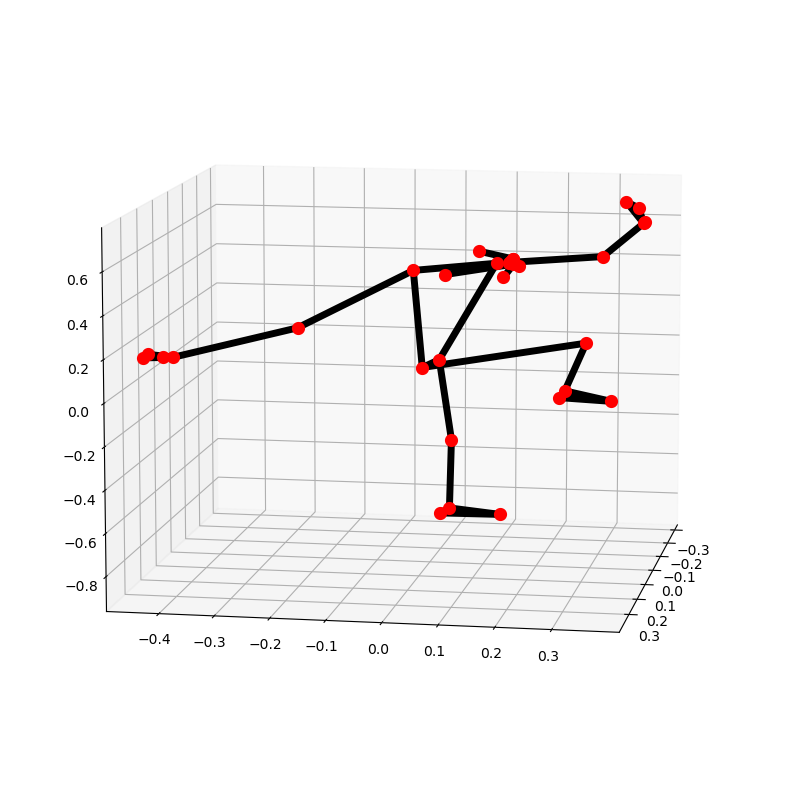

In [16]:
# 3차원으로 pose의 landmark의 위치를 확인
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

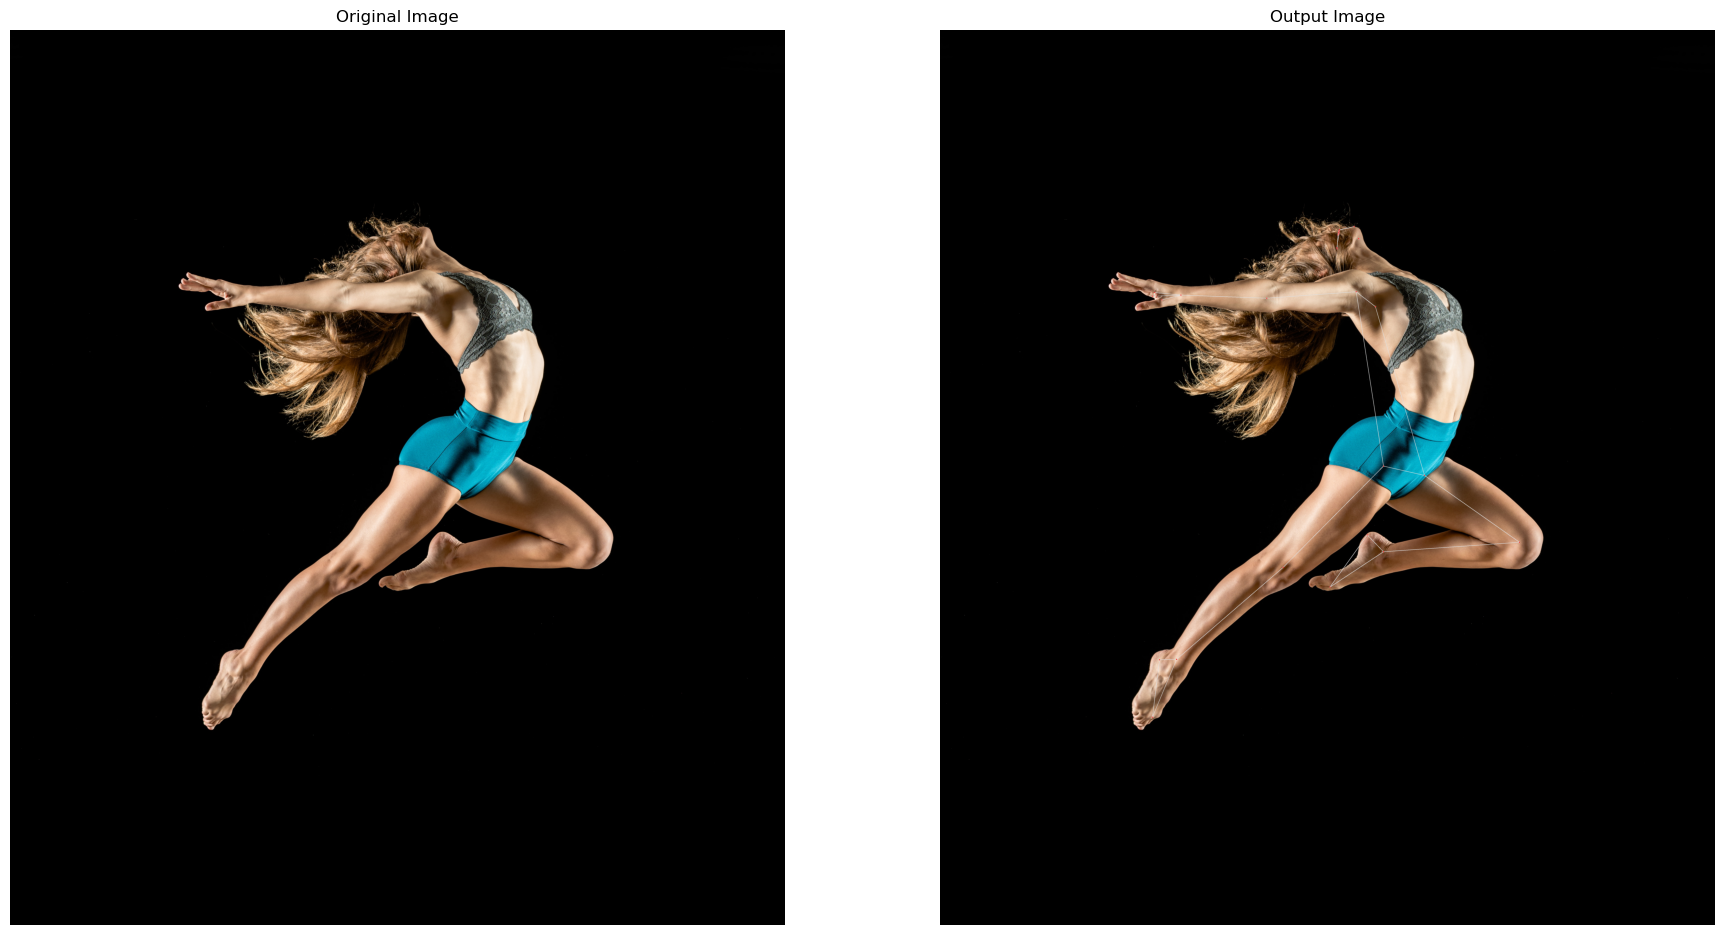

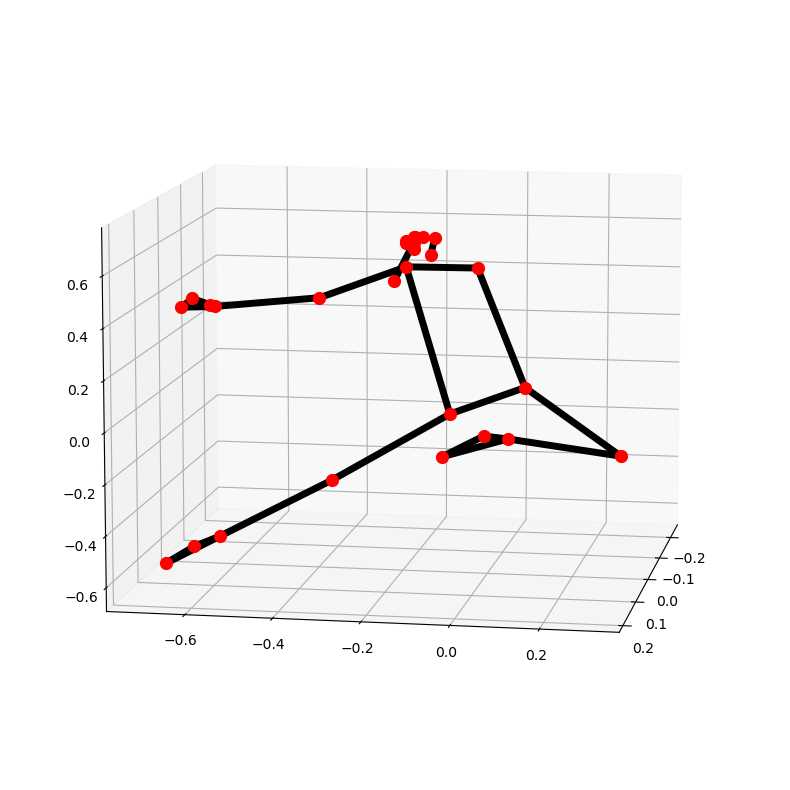

In [19]:
def detectPose(image, pose, display=True):
    '''
    This function performs pose detection on an image.
    Args:
        image: The input image with a prominent person whose pose landmarks needs to be detected.
        pose: The pose setup function required to perform the pose detection.
        display: A boolean value that is if set to true the function displays the original input image, the resultant image, 
                 and the pose landmarks in 3D plot and returns nothing.
    Returns:
        output_image: The input image with the detected pose landmarks drawn.
        landmarks: A list of detected landmarks converted into their original scale.
    '''
    # 예시이미지 copy하기
    output_image = image.copy()

    # 컬러 이미지 BGR TO RGB 변환
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # pose detection 수행
    results = pose.process(imageRGB)

    # input image의 너비&높이 탐색
    height, width, _ = image.shape

    # detection landmarks를 저장할 빈 list 초기화
    landmarks = []

    # landmark가 감지 되었는지 확인
    if results.pose_landmarks:

      # landmark 그리기
      mp_drawing.draw_landmarks(image=output_image, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)

      # 감지된 landmark 반복
      for landmark in results.pose_landmarks.landmark:

        # landmark를 list에 추가하기
        landmarks.append((int(landmark.x * width), int(landmark.y * height), (landmark.z * width)))

    # 오리지널 image와 pose detect된 image 비교
    if display:

      # 오리지널 & 아웃풋 이미지 그리기
      plt.figure(figsize=[22,22])
      plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
      plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');

      # 3D 랜드마크 나타내기
      mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

    # 그렇지 않다면, output_image 와 landmark return한다
    else:

      return output_image, landmarks
# pose detection function start

image = cv2.imread('image/exercise_img/exercise_4.jpg')
detectPose(image, pose, display=True)

In [20]:
# Setup Pose function for video.
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, model_complexity=1)

# Initialize the VideoCapture object to read from the webcam.
#video = cv2.VideoCapture(0)

# Initialize the VideoCapture object to read from a video stored in the disk.
video = cv2.VideoCapture('./videos/baggy_jeans.mp4')


# Initialize a variable to store the time of the previous frame.
time1 = 0

# Iterate until the video is accessed successfully.
while video.isOpened():
    
    # Read a frame.
    ok, frame = video.read()
    
    # Check if frame is not read properly.
    if not ok:
        
        # Break the loop.
        break
    
    # Flip the frame horizontally for natural (selfie-view) visualization.
    frame = cv2.flip(frame, 1)
    
    # Get the width and height of the frame
    frame_height, frame_width, _ =  frame.shape
    
    # Resize the frame while keeping the aspect ratio.
    frame = cv2.resize(frame, (int(frame_width * (640 / frame_height)), 640))
    
    # Perform Pose landmark detection.
    frame, _ = detectPose(frame, pose_video, display=False)
    
    # Set the time for this frame to the current time.
    time2 = time()
    
    # Check if the difference between the previous and this frame time &gt; 0 to avoid division by zero.
    if (time2 - time1) > 0:
    
        # Calculate the number of frames per second.
        frames_per_second = 1.0 / (time2 - time1)
        
        # Write the calculated number of frames per second on the frame. 
        cv2.putText(frame, 'FPS: {}'.format(int(frames_per_second)), (10, 30),cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 3)
    
    # Update the previous frame time to this frame time.
    # As this frame will become previous frame in next iteration.
    time1 = time2
    
    # Display the frame.
    cv2.imshow('Pose Detection', frame)
    
    # Wait until a key is pressed.
    # Retreive the ASCII code of the key pressed
    k = cv2.waitKey(1) & 0xFF
    
    # Check if 'ESC' is pressed.
    if(k == 27):
        
        # Break the loop.
        break

# Release the VideoCapture object.
video.release()

# Close the windows.
cv2.destroyAllWindows()

In [25]:
import cv2 as cv
import mediapipe as mp
import time
import utils, math
import numpy as np
# variables 
frame_counter =0
CEF_COUNTER =0
TOTAL_BLINKS =0
# constants
CLOSED_EYES_FRAME =3
FONTS =cv.FONT_HERSHEY_COMPLEX

# face bounder indices 
FACE_OVAL=[ 10, 338, 297, 332, 284, 251, 389, 356, 454, 323, 361, 288, 397, 365, 379, 378, 400, 377, 152, 148, 176, 149, 150, 136, 172, 58, 132, 93, 234, 127, 162, 21, 54, 103,67, 109]

# lips indices for Landmarks
LIPS=[ 61, 146, 91, 181, 84, 17, 314, 405, 321, 375,291, 308, 324, 318, 402, 317, 14, 87, 178, 88, 95,185, 40, 39, 37,0 ,267 ,269 ,270 ,409, 415, 310, 311, 312, 13, 82, 81, 42, 183, 78 ]
LOWER_LIPS =[61, 146, 91, 181, 84, 17, 314, 405, 321, 375, 291, 308, 324, 318, 402, 317, 14, 87, 178, 88, 95]
UPPER_LIPS=[ 185, 40, 39, 37,0 ,267 ,269 ,270 ,409, 415, 310, 311, 312, 13, 82, 81, 42, 183, 78] 
# Left eyes indices 
LEFT_EYE =[ 362, 382, 381, 380, 374, 373, 390, 249, 263, 466, 388, 387, 386, 385,384, 398 ]
LEFT_EYEBROW =[ 336, 296, 334, 293, 300, 276, 283, 282, 295, 285 ]

# right eyes indices
RIGHT_EYE=[ 33, 7, 163, 144, 145, 153, 154, 155, 133, 173, 157, 158, 159, 160, 161 , 246 ]  
RIGHT_EYEBROW=[ 70, 63, 105, 66, 107, 55, 65, 52, 53, 46 ]

map_face_mesh = mp.solutions.face_mesh
# camera object 
camera = cv.VideoCapture(0)
# landmark detection function 
def landmarksDetection(img, results, draw=False):
    img_height, img_width= img.shape[:2]
    # list[(x,y), (x,y)....]
    mesh_coord = [(int(point.x * img_width), int(point.y * img_height)) for point in results.multi_face_landmarks[0].landmark]
    if draw :
        [cv.circle(img, p, 2, (0,255,0), -1) for p in mesh_coord]

    # returning the list of tuples for each landmarks 
    return mesh_coord

# Euclaidean distance 
def euclaideanDistance(point, point1):
    x, y = point
    x1, y1 = point1
    distance = math.sqrt((x1 - x)**2 + (y1 - y)**2)
    return distance

# Blinking Ratio
def blinkRatio(img, landmarks, right_indices, left_indices):
    # Right eyes 
    # horizontal line 
    rh_right = landmarks[right_indices[0]]
    rh_left = landmarks[right_indices[8]]
    # vertical line 
    rv_top = landmarks[right_indices[12]]
    rv_bottom = landmarks[right_indices[4]]
    # draw lines on right eyes 
    # cv.line(img, rh_right, rh_left, utils.GREEN, 2)
    # cv.line(img, rv_top, rv_bottom, utils.WHITE, 2)

    # LEFT_EYE 
    # horizontal line 
    lh_right = landmarks[left_indices[0]]
    lh_left = landmarks[left_indices[8]]

    # vertical line 
    lv_top = landmarks[left_indices[12]]
    lv_bottom = landmarks[left_indices[4]]

    rhDistance = euclaideanDistance(rh_right, rh_left)
    rvDistance = euclaideanDistance(rv_top, rv_bottom)

    lvDistance = euclaideanDistance(lv_top, lv_bottom)
    lhDistance = euclaideanDistance(lh_right, lh_left)

    reRatio = rhDistance/rvDistance
    leRatio = lhDistance/lvDistance

    ratio = (reRatio+leRatio)/2
    return ratio 

# Eyes Extrctor function,
def eyesExtractor(img, right_eye_coords, left_eye_coords):
    # converting color image to  scale image 
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    # getting the dimension of image 
    dim = gray.shape

    # creating mask from gray scale dim
    mask = np.zeros(dim, dtype=np.uint8)

    # drawing Eyes Shape on mask with white color 
    cv.fillPoly(mask, [np.array(right_eye_coords, dtype=np.int32)], 255)
    cv.fillPoly(mask, [np.array(left_eye_coords, dtype=np.int32)], 255)

    # showing the mask 
    # cv.imshow('mask', mask)
    
    # draw eyes image on mask, where white shape is 
    eyes = cv.bitwise_and(gray, gray, mask=mask)
    # change black color to gray other than eys 
    # cv.imshow('eyes draw', eyes)
    eyes[mask==0]=155
    
    # getting minium and maximum x and y  for right and left eyes 
    # For Right Eye 
    r_max_x = (max(right_eye_coords, key=lambda item: item[0]))[0]
    r_min_x = (min(right_eye_coords, key=lambda item: item[0]))[0]
    r_max_y = (max(right_eye_coords, key=lambda item : item[1]))[1]
    r_min_y = (min(right_eye_coords, key=lambda item: item[1]))[1]

    # For LEFT Eye
    l_max_x = (max(left_eye_coords, key=lambda item: item[0]))[0]
    l_min_x = (min(left_eye_coords, key=lambda item: item[0]))[0]
    l_max_y = (max(left_eye_coords, key=lambda item : item[1]))[1]
    l_min_y = (min(left_eye_coords, key=lambda item: item[1]))[1]

    # croping the eyes from mask 
    cropped_right = eyes[r_min_y: r_max_y, r_min_x: r_max_x]
    cropped_left = eyes[l_min_y: l_max_y, l_min_x: l_max_x]

    # returning the cropped eyes 
    return cropped_right, cropped_left

# Eyes Postion Estimator 
def positionEstimator(cropped_eye):
    # getting height and width of eye 
    h, w =cropped_eye.shape
    
    # remove the noise from images
    gaussain_blur = cv.GaussianBlur(cropped_eye, (9,9),0)
    median_blur = cv.medianBlur(gaussain_blur, 3)

    # applying thrsholding to convert binary_image
    ret, threshed_eye = cv.threshold(median_blur, 130, 255, cv.THRESH_BINARY)

    # create fixd part for eye with 
    piece = int(w/3) 

    # slicing the eyes into three parts 
    right_piece = threshed_eye[0:h, 0:piece]
    center_piece = threshed_eye[0:h, piece: piece+piece]
    left_piece = threshed_eye[0:h, piece +piece:w]
    
    # calling pixel counter function
    eye_position, color = pixelCounter(right_piece, center_piece, left_piece)

    return eye_position, color 

# creating pixel counter function 
def pixelCounter(first_piece, second_piece, third_piece):
    # counting black pixel in each part 
    right_part = np.sum(first_piece==0)
    center_part = np.sum(second_piece==0)
    left_part = np.sum(third_piece==0)
    # creating list of these values
    eye_parts = [right_part, center_part, left_part]

    # getting the index of max values in the list 
    max_index = eye_parts.index(max(eye_parts))
    pos_eye ='' 
    if max_index==0:
        pos_eye="RIGHT"
        color=[utils.BLACK, utils.GREEN]
    elif max_index==1:
        pos_eye = 'CENTER'
        color = [utils.YELLOW, utils.PINK]
    elif max_index ==2:
        pos_eye = 'LEFT'
        color = [utils.GRAY, utils.YELLOW]
    else:
        pos_eye="Closed"
        color = [utils.GRAY, utils.YELLOW]
    return pos_eye, color


with map_face_mesh.FaceMesh(min_detection_confidence =0.5, min_tracking_confidence=0.5) as face_mesh:

    # starting time here 
    start_time = time.time()
    # starting Video loop here.
    while True:
        frame_counter +=1 # frame counter
        ret, frame = camera.read() # getting frame from camera 
        if not ret: 
            break # no more frames break
        #  resizing frame
        
        frame = cv.resize(frame, None, fx=1.5, fy=1.5, interpolation=cv.INTER_CUBIC)
        frame_height, frame_width= frame.shape[:2]
        rgb_frame = cv.cvtColor(frame, cv.COLOR_RGB2BGR)
        results  = face_mesh.process(rgb_frame)
        if results.multi_face_landmarks:
            mesh_coords = landmarksDetection(frame, results, False)
            ratio = blinkRatio(frame, mesh_coords, RIGHT_EYE, LEFT_EYE)
            # cv.putText(frame, f'ratio {ratio}', (100, 100), FONTS, 1.0, utils.GREEN, 2)
            utils.colorBackgroundText(frame,  f'Ratio : {round(ratio,2)}', FONTS, 0.7, (30,100),2, utils.PINK, utils.YELLOW)

            if ratio >5.5:
                CEF_COUNTER +=1
                # cv.putText(frame, 'Blink', (200, 50), FONTS, 1.3, utils.PINK, 2)
                utils.colorBackgroundText(frame,  f'Blink', FONTS, 1.7, (int(frame_height/2), 100), 2, utils.YELLOW, pad_x=6, pad_y=6, )

            else:
                if CEF_COUNTER>CLOSED_EYES_FRAME:
                    TOTAL_BLINKS +=1
                    CEF_COUNTER =0
            # cv.putText(frame, f'Total Blinks: {TOTAL_BLINKS}', (100, 150), FONTS, 0.6, utils.GREEN, 2)
            utils.colorBackgroundText(frame,  f'Total Blinks: {TOTAL_BLINKS}', FONTS, 0.7, (30,150),2)
            
            cv.polylines(frame,  [np.array([mesh_coords[p] for p in LEFT_EYE ], dtype=np.int32)], True, utils.GREEN, 1, cv.LINE_AA)
            cv.polylines(frame,  [np.array([mesh_coords[p] for p in RIGHT_EYE ], dtype=np.int32)], True, utils.GREEN, 1, cv.LINE_AA)

            # Blink Detector Counter Completed
            right_coords = [mesh_coords[p] for p in RIGHT_EYE]
            left_coords = [mesh_coords[p] for p in LEFT_EYE]
            crop_right, crop_left = eyesExtractor(frame, right_coords, left_coords)
            # cv.imshow('right', crop_right)
            # cv.imshow('left', crop_left)
            eye_position, color = positionEstimator(crop_right)
            utils.colorBackgroundText(frame, f'R: {eye_position}', FONTS, 1.0, (40, 220), 2, color[0], color[1], 8, 8)
            eye_position_left, color = positionEstimator(crop_left)
            utils.colorBackgroundText(frame, f'L: {eye_position_left}', FONTS, 1.0, (40, 320), 2, color[0], color[1], 8, 8)
            
            


        # calculating  frame per seconds FPS
        end_time = time.time()-start_time
        fps = frame_counter/end_time

        frame =utils.textWithBackground(frame,f'FPS: {round(fps,1)}',FONTS, 1.0, (30, 50), bgOpacity=0.9, textThickness=2)
        # writing image for thumbnail drawing shape
        # cv.imwrite(f'img/frame_{frame_counter}.png', frame)
        cv.imshow('frame', frame)
        key = cv.waitKey(2)
        if key==ord('q') or key ==ord('Q'):
            break
    cv.destroyAllWindows()
    camera.release()

AttributeError: module 'utils' has no attribute 'colorBackgroundText'

In [22]:
pip install utils

Note: you may need to restart the kernel to use updated packages.
